In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.pylab as pylab
import scipy.io

#import pygal

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib inline

# rms

## kmeans

In [2]:
p_r_k=np.array([[[-9.90636750e+03,  2.25030203e+04],
        [ 2.99316610e+04,  3.83012307e+03],
        [ 4.83747150e+04, -7.16484035e+03],
        [-1.47854585e+04,  7.81413090e+03],
        [-6.46894355e+03,  2.75144737e+02],
        [-1.36485775e+04,  1.54541170e+04],
        [-8.60782690e+03, -1.20947598e+04],
        [-1.21773941e+04, -3.85093610e+03],
        [-3.85465762e+03,  1.61465312e+03]],

       [[-4.45579105e+04, -7.37562067e+03],
        [ 2.80045404e+05, -2.08698288e+03],
        [-2.00368986e+04,  2.73320321e+04],
        [-4.81441982e+03, -1.26581540e+02],
        [-3.68829732e+04, -4.87149950e+03],
        [-4.14181864e+04,  4.75423325e+03],
        [-4.18279388e+04, -5.59014465e+03],
        [ 2.06526929e+05,  1.90980504e+04],
        [-3.40541824e+04,  3.96868453e+03]],

       [[-3.48486250e+02, -2.10095550e+03],
        [ 1.40157384e+05, -3.02193403e+03],
        [-5.86279950e+03,  1.21891255e+04],
        [-2.15442630e+04,  2.95047017e+03],
        [-1.44349681e+04,  8.41830090e+03],
        [-1.83568787e+04,  7.83123035e+03],
        [-1.92955335e+04,  8.31546125e+03],
        [-2.11382781e+04, -5.97195600e+03],
        [-1.70009928e+04,  8.76278863e+03]],

       [[-6.13095665e+03, -9.27107165e+03],
        [ 2.80537850e+05,  1.22871471e+04],
        [-2.15659484e+04,  5.03232337e+04],
        [-1.31132723e+04,  2.71741981e+04],
        [ 1.12881623e+04, -1.17247122e+04],
        [ 1.07934474e+05, -1.35052375e+04],
        [-2.08306250e+02,  6.59480062e+03],
        [-2.94793477e+04,  1.62775321e+04],
        [ 2.22459244e+05,  1.18643010e+03]],

       [[-7.32457720e+04, -3.72185725e+03],
        [ 5.71785855e+05, -1.36834174e+04],
        [-1.64070687e+04,  8.83359539e+04],
        [-3.60951860e+04, -3.60338500e+02],
        [-3.52343655e+04, -1.60175999e+04],
        [ 8.52824940e+04, -9.30633850e+03],
        [-6.90408025e+04, -1.50471625e+04],
        [-5.30911705e+04,  3.52655525e+03],
        [ 1.56922136e+05, -2.13159390e+04]],

       [[ 4.59108830e+04, -1.22404825e+04],
        [ 4.60741782e+04, -4.29796025e+02],
        [ 4.41996050e+02,  4.27671325e+04],
        [-5.43321675e+03,  1.61651055e+03],
        [-2.38024323e+04,  2.92313749e+04],
        [ 4.65534173e+03,  8.04185268e+03],
        [-2.63569020e+04, -1.58786966e+04],
        [ 8.08857800e+03, -7.16826242e+03],
        [-1.75653023e+04,  4.88341472e+04]],

       [[-2.63839375e+04, -1.01021430e+04],
        [ 2.02513255e+05, -1.10566125e+03],
        [-3.05622199e+04,  5.80016228e+04],
        [-9.96701253e+03,  2.09651030e+04],
        [-2.50567887e+04, -1.21476872e+04],
        [-2.70124720e+04, -1.02227380e+03],
        [-3.96304538e+04,  2.80516908e+04],
        [-3.28152605e+04, -2.78957857e+04],
        [-1.59002635e+04,  7.82621315e+03]],

       [[ 3.97899609e+04,  2.06314350e+03],
        [ 1.08654226e+05, -1.14011046e+04],
        [-2.71312795e+04,  8.64581361e+04],
        [-1.44399201e+04, -1.17666233e+04],
        [-2.74269958e+04, -1.57124165e+04],
        [-2.01110836e+04, -8.14266625e+03],
        [-2.30269183e+04, -1.03471160e+04],
        [-1.84891109e+04, -1.16030576e+04],
        [-2.18989987e+04,  5.29666922e+03]],

       [[-1.62161153e+04, -2.81327878e+03],
        [ 9.74934405e+04, -8.89672550e+02],
        [ 3.11270680e+03,  3.73609732e+04],
        [-1.20774475e+04, -1.95781965e+04],
        [ 5.31284401e+04,  4.43503450e+03],
        [ 1.38857138e+04,  2.09526263e+04],
        [ 2.82677850e+03,  1.33221597e+04],
        [-1.77413247e+04, -4.65031025e+03],
        [ 1.99113198e+04, -8.31881255e+03]],

       [[-5.25663478e+03,  3.89491625e+02],
        [ 1.84340465e+04, -4.39583525e+02],
        [ 2.90448565e+04,  2.53585681e+03],
        [-5.36474040e+03,  7.89854663e+03],
        [ 7.04434470e+03,  5.26630047e+03],
        [-1.47911862e+04, -3.68311576e+03],
        [-1.10179465e+04,  8.20254265e+03],
        [ 2.65664628e+04, -2.65959814e+03],
        [-8.05958265e+03, -2.14117918e+03]]])

In [3]:
p_r_k.shape

(10, 9, 2)

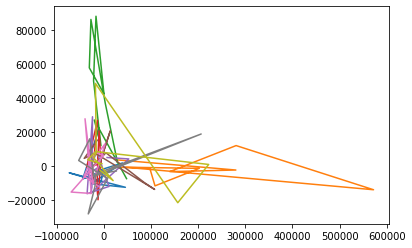

In [18]:
plt.plot(p_r_k[:,0,0] , p_r_k[:,0,1])
plt.plot(p_r_k[:,1,0] , p_r_k[:,1,1])
plt.plot(p_r_k[:,2,0] , p_r_k[:,2,1])
plt.plot(p_r_k[:,3,0] , p_r_k[:,3,1])
plt.plot(p_r_k[:,4,0] , p_r_k[:,4,1])
plt.plot(p_r_k[:,5,0] , p_r_k[:,5,1])
plt.plot(p_r_k[:,6,0] , p_r_k[:,6,1])
plt.plot(p_r_k[:,7,0] , p_r_k[:,7,1])
plt.plot(p_r_k[:,8,0] , p_r_k[:,8,1])

In [ ]:
dt = np.array([[0.997679045092838 ],
               [0.9992042440318303 ],
               [0.9993368700265253 ],
               [0.9987400530503978 ]])
                
svm = np.array([[0.8288461538461538  ],
               [0.969761273209549  ],
               [ 0.9998010610079575 ],
               [1.0]])
                
nb = np.array([[0.4342175066312997 ],
               [ 0.4639920424403184 ],
               [ 0.4913129973474802 ],
               [0.5571618037135279  ]])

knn = np.array([[ 0.9977453580901855 ],
               [ 0.9988726790450929 ],
               [0.9988063660477453  ],
               [0.9986074270557029  ]])

dt = dt * 100
svm = svm * 100
nb = nb * 100
knn = knn * 100

freq = [6 , 7.5 , 8.5 , 10]

plt.plot(freq , dt , marker='o' , label='dt')
plt.plot(freq , svm , marker='s' , label='svm')
plt.plot(freq , nb , marker='p' , label='nb')
plt.plot(freq , knn , marker='*' , label='knn')

plt.legend(loc=3)
plt.ylabel('Accuracy(%)')
plt.xlabel('Frequency(Hz)')

plt.xticks(freq)

plt.title('RMS')

plt.grid() #去掉网格线
plt.show()
plt.close()

## dbscan

In [19]:
p_r_d = np.array([[[-1.64782461e+04 , 1.49257225e+03],
  [ 6.10636399e+04 ,-2.07922467e+03],
  [ 1.45873852e+04 , 1.75359570e+04],
  [-5.09771308e+03 , 1.05058525e+04],
  [-3.62334625e+03 ,-1.18466870e+03],
  [-6.86872177e+03 ,-6.34110417e+03],
  [-1.46916263e+04 ,-8.56212233e+03],
  [-1.36507838e+04 , 1.95631228e+04],
  [-6.23148483e+03 ,-2.54165150e+03]],

 [[-3.05777732e+04 , 1.38436397e+04],
  [ 2.19637563e+05 ,-7.29434784e+03],
  [ 4.92153961e+04 , 3.16576626e+03],
  [-3.14060890e+04 , 5.14915590e+03],
  [-5.00371235e+04 , 4.12506405e+03],
  [-2.69700228e+04 , 4.47897000e+01],
  [ 2.09580726e+05 , 2.40544124e+04],
  [-4.36994653e+04 ,-1.34043935e+04],
  [-3.31455307e+04 , 5.15161400e+03]],

 [[-2.15051708e+04 ,-8.96273125e+03],
  [ 1.64121042e+05 ,-7.06050125e+03],
  [-1.52452850e+04 , 1.71902899e+04],
  [-5.67110485e+03 , 9.83824647e+03],
  [-1.69702201e+04 , 1.60946175e+04],
  [-2.12742910e+04 ,-3.85237750e+02],
  [-2.42212092e+04 , 2.89883250e+03],
  [-2.51494835e+04 ,-5.33948463e+03],
  [-1.18990586e+04 , 1.31438522e+04]],

 [[-3.02925118e+04 , 2.92743908e+04],
  [ 3.15504450e+05 , 1.30719770e+04],
  [-3.89242867e+04 , 6.00767560e+04],
  [ 1.89450405e+04 ,-3.22445217e+04],
  [-1.17007958e+04 , 1.20812375e+02],
  [ 1.04483921e+05 ,-1.20486223e+04],
  [-3.55114598e+04 ,-1.12914537e+04],
  [ 8.21022925e+03 , 3.71763048e+04],
  [ 2.21240636e+05 , 5.26312700e+02]],

 [[ 2.23884370e+05 , 4.03594734e+04],
  [ 3.17047485e+05 ,-1.00439976e+04],
  [-4.21180428e+04 , 5.41536732e+04],
  [-2.03353743e+04 , 1.56943500e+03],
  [-5.90781945e+04 ,-2.05764018e+04],
  [ 8.25175040e+04 ,-1.46896853e+04],
  [-5.74104750e+04 ,-2.14353385e+04],
  [-6.91702318e+04 ,-1.55067052e+04],
  [ 1.55587637e+05 ,-1.47222075e+03]],

 [[ 5.11757240e+04 , 1.47736075e+02],
  [ 4.66636022e+04 ,-1.02718885e+04],
  [-5.48241475e+03 , 3.83182250e+04],
  [-1.93627765e+04 , 1.24109980e+04],
  [ 6.93753500e+03 ,-5.13029650e+03],
  [-1.45140564e+04 , 3.56264860e+04],
  [-6.20036917e+03 , 1.43626835e+04],
  [-1.13208177e+04 ,-1.40325082e+04],
  [-1.59219913e+04 , 2.29766599e+04]],

 [[ 3.72782462e+04 , 7.51350515e+03],
  [ 8.48824482e+04 , 5.29068225e+03],
  [ 3.52493253e+04 , 6.91990133e+04],
  [-2.69572149e+04 ,-3.01239542e+04],
  [-2.52476778e+04 ,-6.68911650e+03],
  [-2.22103925e+04 , 3.04678425e+03],
  [-2.30111577e+04 ,-1.36629360e+04],
  [-3.74710696e+04 , 4.03002487e+04],
  [-2.73802753e+04 ,-1.21670172e+04]],

 [[-3.85506585e+03 ,-2.09603650e+03],
  [ 1.04131734e+05 , 1.41281750e+04],
  [ 3.44110933e+04 , 3.93945815e+04],
  [-2.42418753e+04 , 1.37266700e+03],
  [-2.49979123e+04 ,-1.14484088e+03],
  [-1.84315441e+04 ,-8.60217527e+03],
  [-1.09895035e+04 , 3.27107584e+04],
  [-2.48613717e+04 ,-1.45218148e+04],
  [-2.29274276e+04 ,-1.78777735e+04]],

 [[-1.41524781e+04 ,-5.08702000e+01],
  [ 9.78781221e+04 ,-1.19114714e+03],
  [ 4.79264150e+03 , 3.15433621e+04],
  [-1.10538702e+04 ,-1.30811675e+04],
  [ 3.11878150e+03 ,-5.21834550e+02],
  [-4.80681750e+02 , 6.85961325e+02],
  [ 2.29194409e+04 , 2.37399598e+04],
  [ 1.47525212e+04 ,-6.78143767e+03],
  [ 6.23742825e+03 , 4.85809525e+03]],

 [[-1.06678590e+04 , 2.54770395e+03],
  [ 2.43889593e+04 , 1.71397750e+03],
  [ 2.52461177e+04 , 6.15153044e+03],
  [-3.94988929e+03 , 1.02044358e+03],
  [ 9.09564949e+03 , 3.50422748e+03],
  [-7.19967810e+03 , 3.09530919e+03],
  [ 1.87710887e+04 ,-2.64372043e+02],
  [-1.59010202e+04 ,-7.08936175e+03],
  [-2.76808187e+03 , 4.63946138e+03]]])

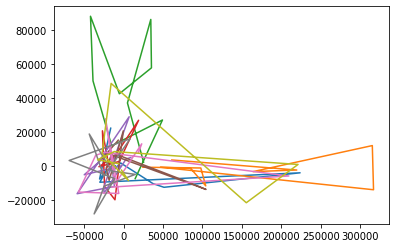

In [20]:
plt.plot(p_r_d[:,0,0] , p_r_k[:,0,1])
plt.plot(p_r_d[:,1,0] , p_r_k[:,1,1])
plt.plot(p_r_d[:,2,0] , p_r_k[:,2,1])
plt.plot(p_r_d[:,3,0] , p_r_k[:,3,1])
plt.plot(p_r_d[:,4,0] , p_r_k[:,4,1])
plt.plot(p_r_d[:,5,0] , p_r_k[:,5,1])
plt.plot(p_r_d[:,6,0] , p_r_k[:,6,1])
plt.plot(p_r_d[:,7,0] , p_r_k[:,7,1])
plt.plot(p_r_d[:,8,0] , p_r_k[:,8,1])

## gmm

In [ ]:
p_r_g = np.array([[[-1.27945475e+04 -1.31752193e+04]
  [ 8.68498120e+04  4.09265307e+03]
  [-1.09126504e+04  3.06711453e+04]
  [-4.84872418e+03 -5.36845431e+03]
  [-1.41604199e+04  2.97991325e+04]
  [-5.42474115e+03 -5.54793630e+03]
  [-1.15425678e+04 -1.11693371e+04]
  [-1.27201357e+04 -1.69405638e+03]
  [ 1.33421015e+04 -1.52288425e+03]]

 [[-3.07765682e+04  2.74389370e+03]
  [ 2.70458021e+05  4.58231941e+02]
  [-1.00269108e+04  2.00879130e+04]
  [-3.29776807e+04 -9.18420665e+03]
  [-3.82374040e+04  6.00105170e+03]
  [-2.65373051e+04 -5.70427268e+02]
  [ 1.98198482e+05 -5.72822052e+03]
  [-4.13874178e+04  2.08892920e+04]
  [-3.81083363e+04  2.21581437e+04]]

 [[-2.33708977e+04 -8.87666583e+03]
  [ 1.64120970e+05 -7.06052550e+03]
  [-8.22410000e+02  2.56247715e+04]
  [-2.13143373e+04  3.89756142e+03]
  [-1.84587883e+04  2.42624700e+03]
  [-1.60325076e+04  1.43651523e+04]
  [-2.36953735e+04 -3.29398250e+03]
  [-2.41825488e+04 -2.84609247e+03]
  [-1.71003760e+04  6.26790800e+03]]

 [[ 2.10635483e+05 -1.38211630e+04]
  [ 6.54461610e+04  1.10950558e+04]
  [-3.18634420e+04  9.35978975e+04]
  [ 1.51459925e+04 -1.94926166e+04]
  [-8.91425860e+03 -2.78016252e+03]
  [ 1.01815628e+05 -1.58558774e+04]
  [-2.86323918e+04 -9.63176330e+03]
  [-1.28507582e+04  3.75885850e+03]
  [ 2.48151945e+05 -1.27239950e+02]]

 [[ 4.39820575e+04 -1.26342016e+04]
  [ 4.61452552e+05 -1.44573651e+04]
  [-1.35020000e+04  1.26324099e+05]
  [-2.30411850e+04 -1.22012730e+04]
  [ 9.15867070e+04 -2.18016039e+04]
  [-6.00473950e+04 -1.80287045e+04]
  [-5.57158555e+04 -1.57546678e+04]
  [-4.91119080e+04 -1.76804922e+04]
  [ 1.55965794e+05 -2.73935300e+03]]

 [[ 2.09943875e+03 -1.29210229e+04]
  [ 8.55785245e+04 -6.09917303e+03]
  [ 1.57517850e+03  4.09017033e+04]
  [ 4.64292805e+03  1.30490078e+04]
  [-9.85701000e+03 -8.68551800e+03]
  [-1.18168648e+04  4.56886317e+04]
  [-1.23329978e+04  4.19440301e+04]
  [ 1.45551202e+04  1.35035240e+03]
  [-2.67803475e+04 -9.19726207e+03]]

 [[ 3.15235393e+04 -1.23293397e+04]
  [ 1.45597421e+05  4.09444250e+02]
  [-1.62388129e+04  9.16658687e+04]
  [-2.96012243e+04 -3.34903148e+04]
  [-1.78145140e+04  1.32958207e+04]
  [-2.91894657e+04 -1.16480463e+04]
  [-3.94550525e+04  3.41586423e+04]
  [-3.21485625e+04 -2.66391438e+04]
  [ 2.91461070e+04 -1.04198599e+04]]

 [[ 3.63979090e+04  3.95450440e+03]
  [ 9.85466003e+04 -9.74185790e+03]
  [-1.12287952e+04  8.78382900e+04]
  [-2.45688950e+04 -2.68489764e+04]
  [-1.97388624e+04  2.86304395e+03]
  [-1.55411028e+04  4.45359400e+03]
  [-2.51392627e+04 -9.94222330e+03]
  [-1.87738851e+04 -9.19252507e+03]
  [-2.46863129e+04 -1.84553375e+04]]

 [[-9.45107812e+03 -1.12708045e+04]
  [ 8.50791427e+04 -1.04656564e+03]
  [ 1.91512225e+03  3.25322282e+04]
  [-5.77946625e+03  1.57540845e+03]
  [ 3.97257630e+04 -4.54405410e+03]
  [-9.88049051e+03  7.75727182e+03]
  [ 6.18595125e+03 -3.01600787e+03]
  [ 2.01298283e+04  2.36300707e+04]
  [ 2.23707315e+03  2.11369616e+04]]

 [[ 7.84652005e+02  4.54986945e+03]
  [ 3.27993682e+04 -1.18627154e+03]
  [ 1.13972339e+04 -6.67071925e+02]
  [-5.40860243e+03  1.36156851e+04]
  [-3.91724805e+03 -6.41535272e+03]
  [ 2.15637068e+04  6.35561862e+03]
  [-1.11310998e+04 -1.18932314e+03]
  [-7.65536478e+03 -6.20175620e+03]
  [-5.46923265e+03  1.01824656e+04]]])

# cnn-ae

## kmeans

In [ ]:
p_c_k = np.array([[[-2.58398257e-02  5.04446442e-03]
  [ 6.84150523e-02  4.50301077e-03]
  [-5.75897395e-02  7.85592168e-03]
  [ 1.07045997e-02  1.26136274e-03]
  [ 6.68357019e-02  9.88539493e-03]
  [ 7.86562272e-02 -7.16560096e-03]
  [-6.50984606e-02  5.93737075e-04]
  [-1.10743641e-02 -9.33934159e-03]
  [-6.61274422e-03  2.67045743e-03]]

 [[-6.08519934e-02  3.71107889e-03]
  [ 2.57064241e-01  5.29799415e-04]
  [-1.87906269e-02 -1.09212243e-03]
  [ 1.13987732e-02  1.00575637e-03]
  [-9.01989065e-03  1.85525889e-03]
  [-1.08420863e-02  4.71054544e-03]
  [-5.11251938e-02 -2.00235168e-03]
  [ 1.94038974e-02  1.23512065e-03]
  [-3.75604501e-02 -2.73766694e-03]]

 [[-6.96653334e-02 -6.73753623e-03]
  [ 3.74755033e-01 -1.12287185e-03]
  [-5.00976798e-03  4.11914946e-03]
  [-5.68060330e-02  2.88718373e-03]
  [-5.82921080e-03  5.33489921e-03]
  [-5.18088473e-02 -1.65988007e-03]
  [-4.55363583e-02  2.20029493e-03]
  [-3.44808024e-02 -1.16792057e-04]
  [-7.77789025e-02 -5.43798823e-03]]

 [[-4.52532262e-02  4.83311932e-04]
  [ 1.31033888e-01 -1.23116328e-02]
  [ 2.38691618e-02  4.70107165e-03]
  [-3.33272273e-02  1.55662183e-02]
  [ 1.15819092e-01  2.60914602e-03]
  [ 4.54078359e-02  2.84431487e-02]
  [-5.35856257e-02 -2.71628351e-03]
  [ 7.28048344e-02 -1.43079302e-02]
  [-1.02238973e-02 -1.69436847e-04]]

 [[-8.28788444e-02 -2.45393318e-03]
  [ 5.72795526e-01 -2.96466149e-03]
  [ 2.97247517e-02  1.50397150e-02]
  [-3.82937110e-02 -1.57811426e-03]
  [-2.27843883e-02  2.03969422e-02]
  [-2.64586779e-02  4.24257022e-02]
  [-8.76666853e-02 -7.65516547e-04]
  [-7.63586687e-02 -1.34724918e-03]
  [-7.91649429e-02 -2.69634575e-03]]

 [[-4.20501285e-02 -6.33543398e-03]
  [ 2.29982491e-01  3.86247081e-03]
  [-7.67898161e-02  4.17901169e-03]
  [ 2.20365149e-01 -1.57476678e-02]
  [ 7.61105735e-02 -4.52759493e-03]
  [ 1.26181206e-01  6.27097317e-03]
  [-6.09498861e-02  4.95710618e-03]
  [-7.19181075e-03  9.11059072e-03]
  [ 2.20162570e-01  2.41816099e-02]]

 [[-8.82345292e-02 -6.98444683e-03]
  [ 4.15719877e-01 -1.28511345e-02]
  [-2.36921267e-03  1.93456199e-02]
  [-3.70417141e-02  1.04020548e-02]
  [ 3.35224942e-02  2.20178686e-02]
  [-4.86877561e-02  2.31543099e-03]
  [-3.41816302e-02 -5.67658141e-03]
  [-6.97124124e-02 -1.20299341e-03]
  [ 1.92759789e-02  1.95781866e-02]]

 [[-6.98977625e-02 -1.07844725e-02]
  [ 3.36208897e-01 -7.34279500e-03]
  [ 6.96975075e-02  1.71112175e-02]
  [-4.27191175e-02  2.48808500e-03]
  [-5.24674750e-02 -2.40941500e-03]
  [-1.75913600e-02  2.10637000e-03]
  [-7.73559675e-02 -3.66025000e-03]
  [-1.85427200e-02  1.56719250e-02]
  [ 1.79012150e-02  1.17220425e-02]]

 [[-2.75650994e-02  4.34276208e-03]
  [ 2.10790583e-01 -8.51134315e-03]
  [ 1.21506012e-01  5.51582301e-03]
  [-1.85684390e-02 -5.25329940e-04]
  [ 2.60840358e-01 -2.29404882e-03]
  [-2.98817476e-02 -1.31783632e-03]
  [ 1.50154115e-01  2.93795516e-03]
  [-6.47543558e-03 -9.14597775e-05]
  [ 4.60561152e-02  4.27125485e-03]]

 [[ 1.66766725e-02  1.80820250e-03]
  [-2.14874575e-02 -2.94830000e-03]
  [ 9.59360000e-02  3.95916250e-03]
  [-1.94187300e-02  1.11655000e-04]
  [ 3.14677550e-02  5.15547250e-03]
  [-4.69460650e-02  4.69180000e-04]
  [-3.70485500e-02 -3.24101750e-03]
  [ 3.43937050e-02 -2.42944250e-03]
  [ 1.28580903e-01 -3.39467500e-04]]])

## dbscan

In [ ]:
p_c_d = np.array([[[ 1.71614463e+03 -7.30418854e-01]
  [-8.13731103e+01  7.98358751e-01]
  [-3.44491300e+02 -1.33960498e+00]
  [-2.50757191e+02 -5.34175703e-01]
  [-1.71708621e+02  5.91065335e-01]
  [-2.25681903e+01  3.46656406e+00]
  [ 1.74461755e+03 -6.68172513e-01]
  [-2.28038013e+02 -5.00096172e-01]
  [-1.49751408e+02  1.09472208e+00]]

 [[-1.96707417e+02  1.35792462e+00]
  [ 1.66108181e+03 -1.72621048e+00]
  [ 2.33533716e+02  5.25049092e+00]
  [-3.62417687e+02 -1.33175561e+00]
  [-1.15556905e+02 -1.45993241e+00]
  [-3.05785255e+02 -1.64586032e+00]
  [ 3.95761994e+02  7.56783359e+00]
  [-2.21103464e+02  2.11476411e+00]
  [ 3.08150875e+02  5.97363400e+00]]

 [[-2.15491205e+02  1.58557388e+00]
  [ 1.68954035e+03 -1.82906213e+00]
  [ 4.17185292e+02  4.23177138e+00]
  [-3.34179493e+02 -1.15061610e+00]
  [-2.96383522e+02 -1.61227493e+00]
  [-1.92528706e+02  1.68273312e+00]
  [-3.67970088e+02 -1.06925982e+00]
  [-2.52913108e+02  2.23228170e-01]
  [-1.46850777e+02  3.88470461e+00]]

 [[-4.17008081e+02 -5.74181867e-01]
  [ 3.89778210e+02 -1.26668105e+00]
  [ 7.20663920e+01  2.09678245e-01]
  [ 1.97366450e+02  5.11730887e-01]
  [ 5.07879726e+02 -1.05309970e+00]
  [ 4.40208834e+01  3.85389889e+00]
  [-1.09910038e+01  1.97153906e-01]
  [ 1.54316177e+02  4.22385807e-01]
  [ 4.21870167e+02 -1.29678194e+00]]

 [[-3.65777244e+02 -1.83569117e+00]
  [ 1.73563962e+03 -2.56992447e+00]
  [ 3.04750273e+02  5.37810967e+00]
  [-1.62293960e+02  2.20864570e+00]
  [ 8.70446989e+01  6.63396517e+00]
  [-2.28004586e+02  8.61730669e-01]
  [-3.10676773e+02 -7.09048462e-01]
  [-3.29674539e+01  4.42696148e+00]
  [ 4.40394242e+02  7.29432259e+00]]

 [[-5.54060150e+02 -8.38312417e-01]
  [ 1.37107533e+03  7.13530816e-01]
  [ 6.10079596e+02 -1.00261080e+00]
  [ 8.39699748e+01  7.98144298e+00]
  [ 1.04597266e+03  1.86604881e+00]
  [ 7.24817508e+02 -4.69484010e+00]
  [-4.76119068e+02 -4.18005036e-01]
  [ 1.20106137e+03  1.94006749e+00]
  [ 1.44277137e+03  5.47634440e-02]]

 [[-3.93201432e+02  1.84063188e-01]
  [ 1.69252146e+03  1.11105539e-01]
  [-8.20286394e+01 -2.18967353e-01]
  [ 2.49307300e+02 -1.92388569e-01]
  [-3.17216966e+02  5.45796933e-02]
  [-1.56115307e+02 -1.35302442e-01]
  [ 3.74950538e+02 -8.18089545e-02]
  [-2.71476477e+02 -8.02563202e-02]
  [-3.51873068e+02  1.01449396e-01]]

 [[-2.14897075e+02 -2.16892910e+00]
  [ 8.00683914e+02 -2.79348159e+00]
  [ 2.35801182e+02  4.73383339e+00]
  [-5.50678873e+01  2.25034061e+00]
  [-1.37807950e+02  5.27134975e-04]
  [ 3.77082507e+02  7.41944682e+00]
  [ 7.65683743e+02 -3.64468102e+00]
  [ 2.97735712e+02  5.67772373e+00]
  [-6.99032706e+01  2.34037269e+00]]

 [[-3.53499161e+02 -1.51138459e+00]
  [ 1.68058182e+03 -1.70827355e+00]
  [ 2.19803794e+02  4.95384803e+00]
  [-2.08242896e+02  6.32499794e-01]
  [ 3.83721126e+02  7.25605367e+00]
  [-1.37608647e+02  8.44840812e-01]
  [-2.42686351e+02 -3.73362685e-02]
  [-3.07392754e+02 -7.58752939e-01]
  [ 2.96423660e+02  5.60555871e+00]]

 [[-2.09882886e+02  1.15138004e+00]
  [ 3.41825939e+02  1.41743948e+00]
  [ 6.64242507e+02 -1.56506532e+00]
  [ 1.34872948e+02 -7.31502383e-01]
  [-7.48443272e+01  7.67735903e-01]
  [-3.57568911e+02 -1.47886823e+00]
  [-1.37679131e+02  9.27052217e-01]
  [ 3.81071562e+01  3.23420680e+00]
  [-2.80517949e+02 -5.35144636e-01]]])

## gmm

In [ ]:
p_c_g = np.array([[[ 2.17089708e+00 -5.47076492e-03]
  [ 6.05112312e-01 -1.97590589e-03]
  [ 4.20456394e-01  3.81250854e-02]
  [-4.52823265e-01 -1.40956770e-02]
  [ 3.65639697e+00 -2.22315859e-02]
  [ 1.03403377e+00  3.08826875e-03]
  [ 9.95109432e-01  2.25878354e-02]
  [ 7.71663276e-01  2.06235030e-02]
  [-7.07440940e-01 -3.49129234e-03]]

 [[-1.51610944e+00 -2.36974925e-03]
  [ 6.21066441e+00  1.24310933e-05]
  [ 4.53847267e+00  3.69500628e-02]
  [ 2.59702115e+00 -1.32228657e-02]
  [ 4.43264707e+00  1.84950768e-03]
  [ 1.51917524e+00  9.00841000e-03]
  [ 5.33267791e+00  1.09862989e-02]
  [ 4.45129578e+00  4.02185305e-01]
  [ 5.55355207e+00 -1.93344988e-01]]

 [[-3.39767875e-01  5.39426825e-03]
  [ 3.03886560e+00 -9.92272650e-03]
  [-1.65828361e+00  4.84663250e-03]
  [ 3.21316176e+00  3.26518362e-02]
  [-1.16723363e+00 -1.62644165e-02]
  [ 1.65577145e-01 -8.43013575e-03]
  [ 3.51423623e+00  8.90017350e-03]
  [-1.85058344e+00  1.26177027e-02]
  [-8.44544813e-01  7.05488708e-03]]

 [[-2.25796667e-01 -3.41888952e-03]
  [ 3.75294600e+00 -2.16361625e-03]
  [-1.11567051e+00 -1.84142312e-03]
  [ 3.01513575e-02  2.47484978e-03]
  [ 1.59674602e-01  2.01895603e-03]
  [ 2.18128440e+00  6.71574723e-01]
  [ 2.82070758e-01  5.75908148e-01]
  [-1.32232840e+00 -2.67399325e-03]
  [-3.20075270e-01  7.40777300e-04]]

 [[-1.42761655e+00 -2.17470316e-03]
  [ 1.77366437e+01 -4.91876425e-02]
  [ 3.71162480e+00  1.78879371e-02]
  [-9.10580970e-01 -1.11031689e-02]
  [ 1.19598863e+01  2.39527954e+00]
  [-1.59690312e+00 -2.03834777e-04]
  [ 4.87446760e+00  1.81535586e+00]
  [-1.31213776e+00 -6.82591209e-03]
  [-1.19196704e+00 -1.03364091e-02]]

 [[-1.86934150e+00 -2.42268212e-02]
  [ 1.30135603e+01 -1.07571618e-02]
  [ 7.48051125e-02  1.42266710e-02]
  [-9.65616080e-01 -8.76743450e-03]
  [-4.09120105e-01  3.46102118e-02]
  [-7.45904475e-02  4.13905775e-02]
  [ 7.75590012e-01  1.93940210e-02]
  [-2.42579561e+00 -2.61217175e-03]
  [ 1.24960167e-01  4.14898050e-02]]

 [[-2.48605336e+00 -1.88455222e-02]
  [ 1.70635692e+01 -7.68523175e-03]
  [ 3.31482250e-03  6.03237688e-02]
  [-1.17007117e+00  1.37854105e-02]
  [-2.83566098e+00 -2.50485875e-03]
  [-1.56696282e+00  8.70710350e-03]
  [-6.19766607e-01 -1.39268435e-02]
  [ 1.22289240e-01  5.40560600e-02]
  [-2.99617724e+00  2.02118647e-02]]

 [[-1.64798317e+00 -9.17054075e-03]
  [ 8.96769000e+00 -3.25684875e-02]
  [ 2.32529399e+00  7.78567923e-02]
  [-2.21041900e-01 -9.09744398e-03]
  [-1.83285601e+00  4.34280054e-01]
  [-1.99215591e+00  3.97586327e-01]
  [-3.49441525e-02 -8.43572850e-03]
  [-7.83620748e-01 -8.34252427e-03]
  [-1.05388354e+00 -1.40305992e-02]]

 [[ 2.16405563e+00 -5.01062075e-03]
  [-3.96359010e-01 -3.81232648e-03]
  [-1.18931963e+00  1.59818625e-03]
  [ 7.53347123e-01  2.18009160e-02]
  [ 1.47903343e+00 -1.15622112e-02]
  [ 2.69165471e+00 -1.77384140e-02]
  [-1.37986236e+00 -5.61333650e-03]
  [-1.82799917e-01  1.58068235e-02]
  [ 1.84897110e+00  6.97606500e-04]]

 [[-5.09954742e-01  2.18905598e-02]
  [ 5.58443551e+00 -5.65524878e-03]
  [ 3.91070920e-01  5.00389270e-03]
  [ 4.21971027e-01 -3.67238475e-03]
  [ 7.13697211e+00  2.50294839e-01]
  [ 7.77970068e-01 -1.16046249e-03]
  [ 6.07027259e+00  2.70986309e-02]
  [-3.04488757e-01  2.44856038e-02]
  [ 6.42435585e+00 -9.33054468e-03]]])